# CS 109A/AC 209A/STAT 121A Data Science: Homework 8
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, November 16th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW8.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.cross_validation import KFold
from sklearn import svm
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

C:\Users\mezot\Anaconda3\envs\Python27\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

Tarazi, Ramez

### Part (b): Course Number

CS 109a

### Part (c): Who did you work with?

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Image Processing Revisited

In this problem we revisit applications of classification, with the purpose of comparing the performance of support vector classifiers with other classifiers we have learned. We'll begin with the aeriel vegetation detection problem from Homework #7.

The data is contained in `dataset_1.txt` and `dataset_2.txt` (you are encouraged to use the datasets from Homework #7 as well). The first two columns of the data contains the latitude and longitudes of randomly sampled locations in the satellite image, and the last column contains a label indicating whether the location contains vegetation (1 denotes the presence of vegetation and 0 denotes otherwise). The task is to, again, identify the vegetation regions in the image.

- Compare the result of using support vector classifiers to perform classification against results obtained from other models you have learned. Which model is more appropriate for the general task of vegetation detection in aerial images (do not restrict yourself to which model performs better on just these two datasets)? Which model is more appropriate for other types of image processing (hand-writting digit classification for example) Your comparison should be both **qualitative** and quantitative.

    **Hint:** For your analysis, it's vital to consider the differences between the ways in which each of these models perform classification. These differences can be gauged by looking at the differences between the decision boundaries drawn by the models and **how** these boundaries are determined. 
    
- Are there any obvious draw backs to support vector classifiers as we have presented them to you? What might be some intuitive ways to address these draw backs?

Again, we provide you with a function `plot_decision_boundary` to visualize the decision boundary of a classifier.

In [5]:
#--------  plot_decision_boundary
# A function that visualizes the data and the decision boundaries
# Input: 
#      x (predictors)
#      y (labels)
#      model (classifier)
#      poly_flag (fits quadratic model if true, otherwise linear)
#      title (title for plot)
#      ax (a set of axes to plot on)
# Returns: 
#      ax (axes with data and decision boundaries)

def plot_decision_boundary(x, y, model, title, ax, bounds=(0, 1), poly_flag=False):
    # Plot data
    ax.scatter(x[y == 1, 0], x[y == 1, 1], c='green')
    ax.scatter(x[y == 0, 0], x[y == 0, 1], c='white')
    
    # Create mesh
    interval = np.arange(bounds[0], bounds[1], 0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    xx = np.concatenate((x1, x2), axis=1)

    # Predict on mesh points
    if(poly_flag):
        quad_features = preprocessing.PolynomialFeatures(degree=2)
        xx = quad_features.fit_transform(xx)
        
    yy = model.predict(xx)    
    yy = yy.reshape((n, n))

    # Plot decision surface
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    ax.contourf(x1, x2, yy, alpha=0.1, cmap='Greens')
    
    # Label axes, set title
    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    
    return ax


Step 1: Load the data and explore
Let's load the two datasets and visualize.

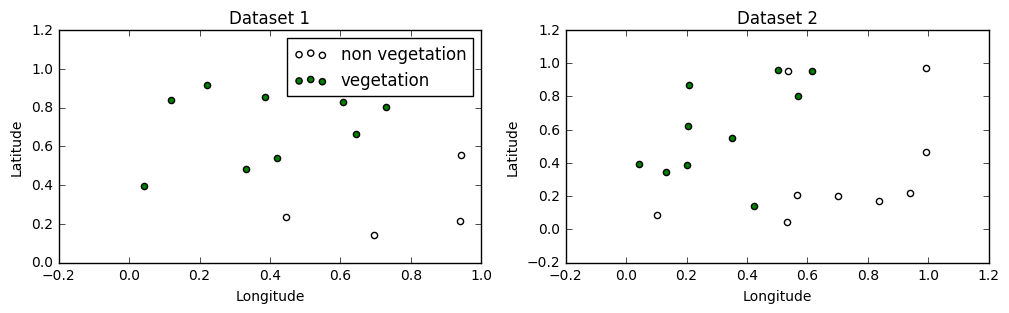

In [3]:
# Load dataset_1
data_1 = pd.read_csv('datasets/dataset_1_train.txt', delimiter=',')

# Load dataset_2
data_2 = pd.read_csv('datasets/dataset_2_train.txt', delimiter=',')

# Plot data
fig, ax = plt.subplots(1, 2, figsize = (12, 3))

#Plot dataset 1

x = data_1.values[:, :-1]
y = data_1.values[:, -1]

ax[0].scatter(x[y==0, 0], x[y==0, 1], c='white', label='non vegetation')
ax[0].scatter(x[y==1, 0], x[y==1, 1], c='green', label='vegetation')

ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].set_title('Dataset 1')
ax[0].legend(loc='best')

#Plot dataset 2

x = data_2.values[:, :-1]
y = data_2.values[:, -1]

ax[1].scatter(x[y==0, 0], x[y==0, 1], c='white', label='non vegetation')
ax[1].scatter(x[y==1, 0], x[y==1, 1], c='green', label='vegetation')

ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')
ax[1].set_title('Dataset 2')

plt.show()


It looks like the classes in dataset 1 is well separated, while the classes in dataset 2 is not.

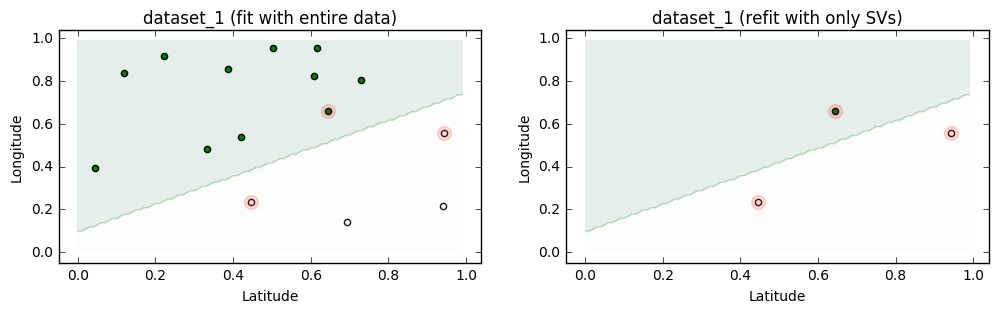

In [6]:
# Load dataset_1
x = data_1.values[:, :-1]
y = data_1.values[:, -1]

# Fit SVM model with C = 1000, linear kernel
model = svm.SVC(C=1000, kernel='linear')
model.fit(x, y)

# Plot decision boundary
fig, ax = plt.subplots(1, 2, figsize = (12, 3))
ax[0] = plot_decision_boundary(x, y, model, 'dataset_1 (fit with entire data)', ax[0])

# Highlight the support vectors
sv_indices = model.support_ # retrieve the support vector indices
ax[0].scatter(x[sv_indices, 0], x[sv_indices, 1], color='red', alpha=0.15, s=100) # draw circles around SVs

# Isolate only support vectors and their labels
x_svs = x[sv_indices, :] 
y_svs = y[sv_indices]
model.fit(x_svs, y_svs)

# Plot decision boundary with only support vectors
ax[1] = plot_decision_boundary(x_svs, y_svs, model, 'dataset_1 (refit with only SVs)', ax[1])

# Highlight the support vectors
ax[1].scatter(x_svs[:, 0], x_svs[:, 1], color='red', alpha=0.15, s=100) # draw circles around SVs

plt.show()

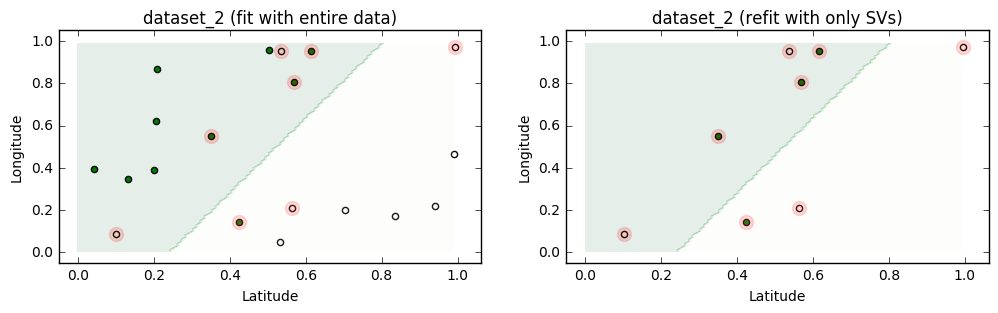

In [7]:
# Load dataset_1
x = data_2.values[:, :-1]
y = data_2.values[:, -1]

# Fit SVM model with C = 1000, linear kernel
model = svm.SVC(C=1000, kernel='linear')
model.fit(x, y)

# Plot decision boundary
fig, ax = plt.subplots(1, 2, figsize = (12, 3))
ax[0] = plot_decision_boundary(x, y, model, 'dataset_2 (fit with entire data)', ax[0])

# Highlight the support vectors
sv_indices = model.support_ # retrieve the support vector indices
ax[0].scatter(x[sv_indices, 0], x[sv_indices, 1], color='red', alpha=0.15, s=100) # draw circles around SVs

# Isolate only support vectors and their labels
x_svs = x[sv_indices, :] 
y_svs = y[sv_indices]
model.fit(x_svs, y_svs)

# Plot decision boundary with only support vectors
ax[1] = plot_decision_boundary(x_svs, y_svs, model, 'dataset_2 (refit with only SVs)', ax[1])

# Highlight the support vectors
ax[1].scatter(x_svs[:, 0], x_svs[:, 1], color='red', alpha=0.15, s=100) # draw circles around SVs

plt.show()

It appears that in both cases, the decision boundary of an SVM is completely determined by a subset of data points - the support vectors. In Dataset 1, it's possible to find a subset of points from the two classes that are well separated, SVM chooses the subset in which the classes are maximally separated (the margin between points from different classes is maximized). In Dataset 2 it is not possible. Any decision boundary will have some errors (a mix of classes on either side). In this case, how do we choose the best support vectors or best margin?

### Step 2: Play with values of the parameters of the model

In defining our support vector classifier, we needed to specify the parameter `C` and `kernel`. What doest the parameter `C` control?

In [8]:
#--------  fit_and_plot_svm_for_c
# Fit and plot SVM model for value of 'C', overlayed on a scatter plot of data 
# (fit on train set and evaluate on test set)
#
# Input: 
#      x_train (array of train predictors)
#      y_train (array of train responses)#      
#      x_test (array of test predictors)
#      y_test (array of test responses)
#      bounds (tuple of bounds for plotting)
#      C  (value for parameter C)
#      ax (axes to plot on)

def fit_and_plot_svm_for_c(x_train, y_train, x_test, y_test, C, ax, bounds=(0, 1)):
    # Fit SVM model
    model = svm.SVC(C=C, kernel='linear')
    model.fit(x_train, y_train)
    
    # Train and test error
    tr_acc = model.score(x_train, y_train)
    ts_acc = model.score(x_test, y_test)

    # Plot decision boundary
    plot_decision_boundary(x_train, y_train, model, \
                           'C = ' + str(C)\
                           + ', train acc = ' + str(tr_acc)\
                           + ', test acc = ' + str(ts_acc), ax, bounds)
    
    # Plot support vectors
    sv_indices = model.support_ # retrieve the support vector indices
    ax.scatter(x_train[sv_indices, 0], x_train[sv_indices, 1], color='red', alpha=0.15, s=100) # draw circles around SVs
    
    return ax

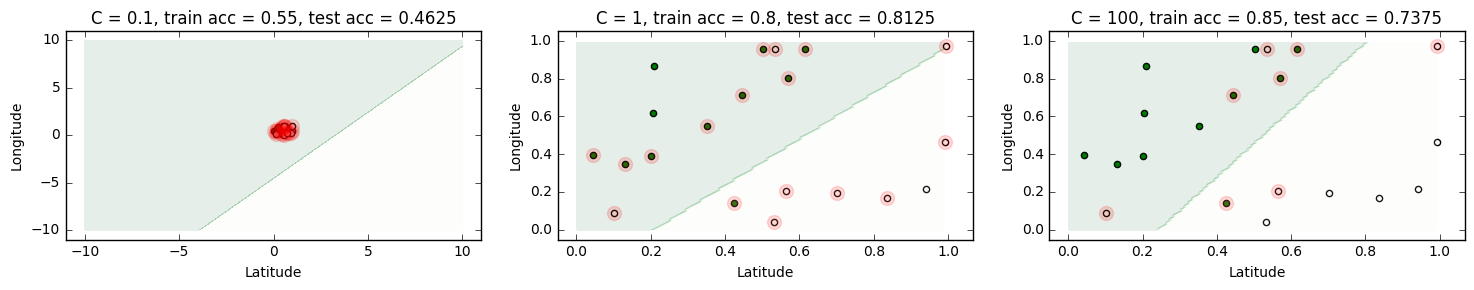

In [9]:
# Load train data
data_train = np.loadtxt("datasets/dataset_2_train.txt", delimiter=',')
x_train = data_train[:, 0:-1]
y_train = data_train[:, -1]

# Load test data
data_test = np.loadtxt("datasets/dataset_2_test.txt", delimiter=',')
x_test = data_test[:, 0:-1]
y_test = data_test[:, -1]

# Fit and plot for different 'C' values
fig, ax = plt.subplots(1, 3, figsize = (15, 3))

ax[0] = fit_and_plot_svm_for_c(x_train, y_train, x_test, y_test, 0.1, ax[0], (-10, 10))

ax[1] = fit_and_plot_svm_for_c(x_train, y_train, x_test, y_test, 1, ax[1])

ax[2] = fit_and_plot_svm_for_c(x_train, y_train, x_test, y_test, 100, ax[2])

plt.tight_layout()

For `dataset_2`, any linear decision boundary would have some errors. In this case, SVM chooses a decision boundary by trading-off the errors for margin (i.e. balancing minimizing error with maximizing margin). It appears that the parameter $C$ controls the trade-off. 

Increasing $C$ lays more emphasis on accuracy and less emphasis on the margin of separation. As a result, the model tends to overfit the train set, and perform poorly on the test set.

For $C=0.01$, the model clearly underfits the train set. For $C=100$, the model overfits the train set. For $C=1$, the fitted model misclassifies a point in the upper left corner (which could have othwerwise been classified correctly by a linear model), and achieves higher margin.


### Step 3: Push your analysis further

**Lingering Questions:**

1. How does SVM compare with the other classifiers we know?
2. It looks like the only decision boundaries SVM draws, so far, are lines. This is pretty limiting. Is there any way for us to change the shape of the decision boundary (how did we get logistic regression to draw curvy boundaries)? **Hint:** experiment with the `kernel` parameter in `sklearn`'s SVM model. What does the `kernel` parameter control? What is it doing to your data (draw an analogy to logistic regression with non-linear boundaries)?
3. Which model is better for remote senseing? In this lab, we've only explored SVM. How does SVM compare with other classifiers in terms of addressing the challenges of remote sensing for land cover analysis?

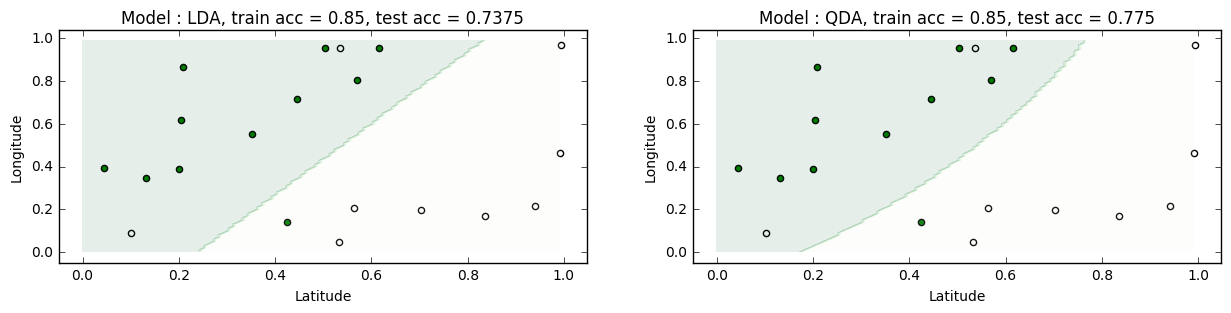

In [65]:
# Load train data
data_train = np.loadtxt("datasets/dataset_2_train.txt", delimiter=',')
x_train = data_train[:, 0:-1]
y_train = data_train[:, -1]

# Load test data
data_test = np.loadtxt("datasets/dataset_2_test.txt", delimiter=',')
x_test = data_test[:, 0:-1]
y_test = data_test[:, -1]

# Fit and plot for different 'C' values
fig, ax = plt.subplots(1, 2, figsize = (15, 3))

ax[0] = fit_and_plot_lda(x_train, y_train, x_test, y_test, 10, ax[0])

ax[1] = fit_and_plot_qda(x_train, y_train, x_test, y_test, 10, ax[1])



In [63]:
def fit_and_plot_lda(x_train, y_train, x_test, y_test, C, ax, bounds=(0, 1)):
    # Fit LDA model
    lda = LinearDiscriminantAnalysis(n_components=2)
    lda_mod = lda.fit(x_train, y_train)
    
    # Train and test error
    tr_acc = lda_mod.score(x_train, y_train)
    ts_acc = lda_mod.score(x_test, y_test)
    
    # Plot decision boundary
    plot_decision_boundary(x_train, y_train, lda, \
                           'Model : ' + str("LDA")\
                           + ', train acc = ' + str(tr_acc)\
                           + ', test acc = ' + str(ts_acc), ax, bounds)
    return ax

In [64]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

def fit_and_plot_qda(x_train, y_train, x_test, y_test, C, ax, bounds=(0, 1)):
    # Fit QDA model
    qda = QuadraticDiscriminantAnalysis(store_covariances=True)
    qda_mod = qda.fit(x_train, y_train)
    
    # Train and test error
    tr_acc = qda_mod.score(x_train, y_train)
    ts_acc = qda_mod.score(x_test, y_test)

    # Plot decision boundary
    plot_decision_boundary(x_train, y_train, qda, \
                           'Model : ' + str("QDA")\
                           + ', train acc = ' + str(tr_acc)\
                           + ', test acc = ' + str(ts_acc), ax, bounds)
    return ax

In [ ]:
#--------  fit_and_plot_svm_rbf_for_c
# Fit and plot SVM model for value of 'C', overlayed on a scatter plot of data 
# (fit on train set and evaluate on test set)
#
# Input: 
#      x_train (array of train predictors)
#      y_train (array of train responses)#      
#      x_test (array of test predictors)
#      y_test (array of test responses)
#      bounds (tuple of bounds for plotting)
#      C  (value for parameter C)
#      ax (axes to plot on)

def fit_and_plot_svm_rbf_for_c(x_train, y_train, x_test, y_test, C, ax, bounds=(0, 1)):
    # Fit SVM model
    model = svm.SVC(C=C, kernel='rbf')
    model.fit(x_train, y_train)
    
    # Train and test error
    tr_acc = model.score(x_train, y_train)
    ts_acc = model.score(x_test, y_test)

    # Plot decision boundary
    plot_decision_boundary(x_train, y_train, model, \
                           'C = ' + str(C)\
                           + ', train acc = ' + str(tr_acc)\
                           + ', test acc = ' + str(ts_acc), ax, bounds)
    
    # Plot support vectors
    sv_indices = model.support_ # retrieve the support vector indices
    ax.scatter(x_train[sv_indices, 0], x_train[sv_indices, 1], color='red', alpha=0.15, s=100) # draw circles around SVs
    
    return ax

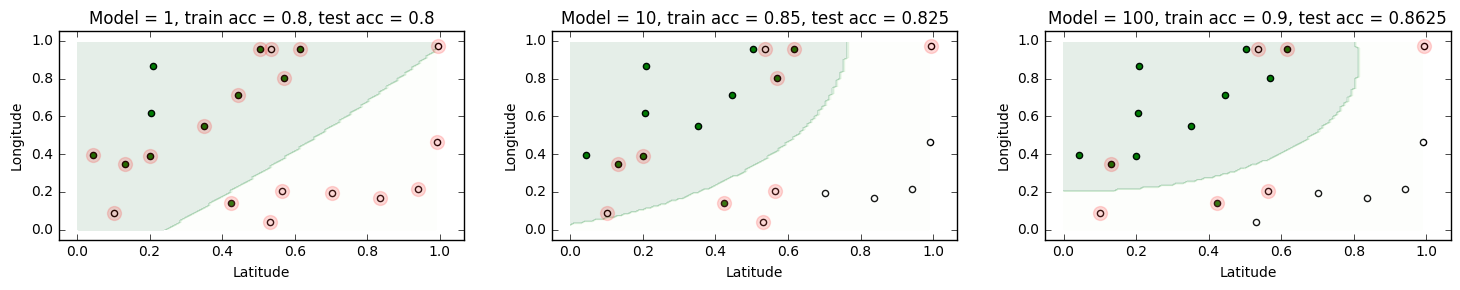

In [70]:
# Load train data
data_train = np.loadtxt("datasets/dataset_2_train.txt", delimiter=',')
x_train = data_train[:, 0:-1]
y_train = data_train[:, -1]

# Load test data
data_test = np.loadtxt("datasets/dataset_2_test.txt", delimiter=',')
x_test = data_test[:, 0:-1]
y_test = data_test[:, -1]

# Fit and plot for different 'C' values
fig, ax = plt.subplots(1, 3, figsize = (15, 3))

ax[1] = fit_and_plot_svm_rbf_for_c(x_train, y_train, x_test, y_test, 10, ax[1])

ax[0] = fit_and_plot_svm_rbf_for_c(x_train, y_train, x_test, y_test, 1, ax[0])

ax[2] = fit_and_plot_svm_rbf_for_c(x_train, y_train, x_test, y_test, 100, ax[2])

plt.tight_layout()

1. SVM with linear Kernel performed indentically to LDA, on remote sensing for land analysis dataset. 

2. I used SVM with RBF kernel to perform a non-linear decision boundary

3. With SVM with C=100 did increase the test accuracy over QDA, with the RBF Kernel. This was the best accuracy obtained from all classifiers tested including SVM with linear kernel. SVMs hyperplane was more flexible at C=100 allowing it to create an oval shape which classified the test dataset with additional accuracy.

## Problem 2 (Optional): Classification Competition

This problem will involve an class-wide model building competition, where you will compete with each other in building a prediction model for cancer diagnosis. The results will be displayed live on a public leaderboard. The competition begins on Nov 9th, 3:00pm, and end on Nov 16th, 11:59pm. 

Please access the following link for all relevant details (data set, submission instructions, evaluation metric, leader board, etc.):
https://inclass.kaggle.com/c/harvard-data-science-course-competition

**Reward:** The top 20% of students on the leaderboard will each receive one bonus point to apply to an homework score of their choice (meaning you can turn a homework score of 2 to a 3, 3 to a 4, 5 to a 6 etc).#

In [166]:
##NOT ACTUAL SUBMISSION
##HAD ISSUES WITH THIS NOTEBOOK

# Load train data
x_train = np.loadtxt("kaggle/train_predictors.txt", delimiter=',')
y_train = np.loadtxt("kaggle/train_labels.txt", delimiter=',')

# Load test data
x_test = np.loadtxt("kaggle/test_predictors.txt", delimiter=',')

In [114]:
print x_train.shape
print y_train.shape
print x_test.shape
print np.max(x_train)

(67904L, 102L)
(67904L,)
(33149L, 102L)
152.60663


ValueError: X.shape[1] = 2 should be equal to 102, the number of features at training time

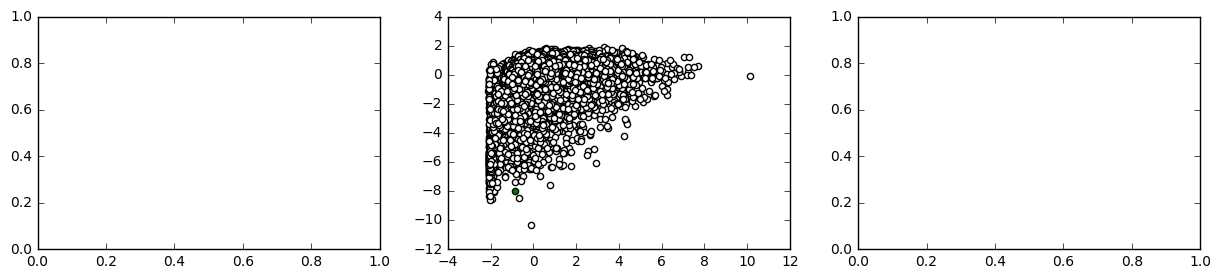

In [116]:
fig, ax = plt.subplots(1, 3, figsize = (15, 3))

ax[0] = fit_and_plot_svm_rbf_for_cl(x_train, y_train, x_test, 1, ax[0])
ax[1] = fit_and_plot_svm_rbf_for_cl(x_train, y_train, x_test, 10, ax[1])
ax[2] = fit_and_plot_svm_rbf_for_cl(x_train, y_train, x_test, 0.1, ax[2])

In [115]:
def fit_and_plot_svm_rbf_for_cl(x_train, y_train, x_test, C, ax, bounds=(0, 1)):
    # Fit SVM model
    model = svm.SVC(C=C, kernel='rbf')
    model.fit(x_train, y_train)
    
    # Train and test error
    tr_acc = model.score(x_train, y_train)

    # Plot decision boundary
    plot_decision_boundary(x_train, y_train, model, \
                           'C = ' + str(C)\
                           + ', train acc = ' + str(tr_acc)\
                           + ', test acc = ' + str(ts_acc), ax, bounds)
    
    # Plot support vectors
    sv_indices = model.support_ # retrieve the support vector indices
    ax.scatter(x_train[sv_indices, 0], x_train[sv_indices, 1], color='red', alpha=0.15, s=100) # draw circles around SVs
    
    return ax

In [162]:
model = svm.SVC(C=10, kernel='rbf', degree=2)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [163]:
print y_pred.shape
print model.score(x_train,y_train)

(33149L,)
0.997025212064


In [164]:

df = pd.DataFrame(y_pred)
df.columns = ['label']
#df['index'] = range(0, len(df))
df.label = df.label.astype(int)
df.index += 1 
print df.head()
df.to_csv('out.txt', sep=',',index_label='index')

   label
1      0
2      0
3      0
4      0
5      0


---

## Challenge Problem: Meta Learning

In the problem, you are provided with 10 different previously trained prediction models for a spam classification task. The task is to investigate how can one combine these models into a single meta classification model (without retraining the individual models) that performs better than each of the individual ones? 

The data for this problem is provided in the files `dataset_5_train.txt` and `dataset_5_test.txt`. Each row of these files is an email described by 57 attributes, and the last column is 1 if the email is spam, and 0 otherwise. 

The prediction models are provided in the file `models.npy` and can be loaded into an array by executing: 

`models = np.load('models.npy')`

As before, you can make predictions using the $i^\text{th}$ using:

`model[i].predict(x_test)` 

and score the model using:

`model[i].score(x_test, y_test)`

The baseline for this task is a simple combination strategy that takes a majority vote from the individual prediction models.

**Any reasonable model that performs better than the baseline model on the test set will receive full credit.**

There are many intuitive ways to combine these 10 models into one; a more sophisticated approach is called "mixture of experts". In this problem, we are not requiring you to implement any particular approach.

---